## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error as mse

## Loading Data

In [2]:
df = pd.read_csv('house pricing delhi- MagicBricks.csv')

In [3]:
df.head()

,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
0,950.0,2,2.0,Furnished,Karol Bagh,Central Delhi,"DDA MIG Flats Prasad Nagar Phase 2, Prasad Nag...",1.0,Ready_to_move,Resale,Apartment,8761.0,12500000
1,535.0,2,1.0,Furnished,Karol Bagh,Central Delhi,"Dev Nagar, Karol Bagh",1.0,Ready_to_move,New_Property,Apartment,7290.0,3900000
2,1280.0,3,3.0,Furnished,Karol Bagh,Central Delhi,Karol Bagh,2.0,Ready_to_move,Resale,Builder_Floor,14092.0,15000000
3,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,22222.0,25000000
4,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,22222.0,25000000


## Data Preprocessing

In [4]:
df.describe()

,Area,BHK,Bathroom,Parking,Per_Sqft,Price
count,1214.000000,1214.000000,1212.000000,1182.000000,973.000000,1.214000e+03
mean,1451.850751,2.778418,2.523927,1.708122,15574.885920,2.079898e+07
std,1586.472855,0.946811,1.017723,5.717177,21574.389007,2.561308e+07
min,28.000000,1.000000,1.000000,1.000000,1259.000000,1.000000e+06
25%,800.000000,2.000000,2.000000,1.000000,6154.000000,5.600000e+06
50%,1150.000000,3.000000,2.000000,1.000000,10838.000000,1.400000e+07
75%,1620.000000,3.000000,3.000000,2.000000,17647.000000,2.500000e+07
max,24300.000000,10.000000,7.000000,114.000000,183333.000000,2.400000e+08


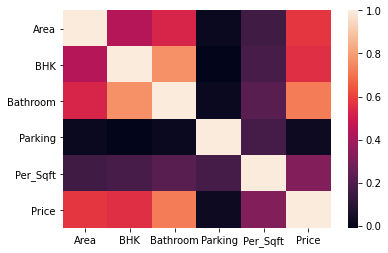

In [5]:
sns.heatmap(df.corr())

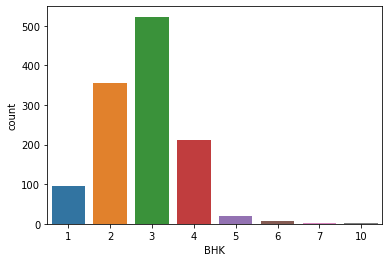

In [6]:
sns.countplot(df['BHK'])

In [7]:
df['BHK'].value_counts()

3     523
2     356
4     212
1      96
5      19
6       6
10      1
7       1
Name: BHK, dtype: int64

In [8]:
df[df['BHK']>=6]

,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
37,4050.0,6,3.0,Furnished,Budh Vihar,North West Delhi,Budh Vihar Phase 1,1.0,Ready_to_move,Resale,Builder_Floor,1259.0,5100000
39,2400.0,6,4.0,Furnished,Budh Vihar,North West Delhi,Budh Vihar Phase 2,1.0,Ready_to_move,Resale,Builder_Floor,2500.0,6000000
72,2970.0,7,4.0,Furnished,Shahdara,Shahdara,"Yamuna Vihar, Shahdara",1.0,Ready_to_move,Resale,Builder_Floor,8923.0,26500000
78,324.0,6,3.0,Furnished,Shahdara,Shahdara,"Yamuna Vihar, Shahdara",1.0,Ready_to_move,Resale,Builder_Floor,35714.0,8700000
79,720.0,6,5.0,Furnished,Shahdara,Shahdara,"Yamuna Vihar, Shahdara",1.0,Ready_to_move,Resale,Builder_Floor,35714.0,22000000
133,5500.0,6,7.0,Furnished,Safdarjung Enclave,South West Delhi,Safdarjung Enclave,1.0,Ready_to_move,Resale,Apartment,14818.0,160000000
632,2800.0,6,4.0,Semi-Furnished,Friends Colony,South Delhi,"Taimoor Enclave, New Friends Colony carpet are...",2.0,Ready_to_move,Resale,Apartment,15459.0,29500000
642,1200.0,10,4.0,Semi-Furnished,Sarita Vihar,South East Delhi,"DDA Flats Sarita Vihar, Sarita Vihar, Mathura ...",2.0,Ready_to_move,Resale,Apartment,NaN,17000000


In [9]:
df.drop([37, 39, 72, 78, 79, 133, 632, 642],inplace=True)

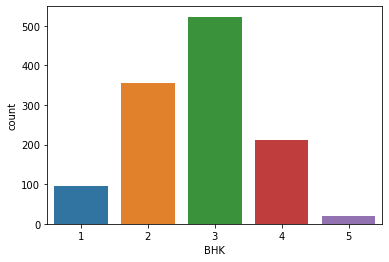

In [10]:
sns.countplot(df['BHK'])

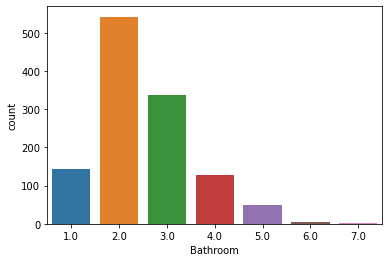

In [11]:
sns.countplot(df['Bathroom'])

In [12]:
df[df['Bathroom']>=6]

,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
16,810.0,5,6.0,Furnished,Geeta Colony,East Delhi,Geeta Colony,1.0,Ready_to_move,Resale,Apartment,6667.0,28900000
515,10350.0,4,7.0,Semi-Furnished,Friends Colony,South Delhi,"Maharani Bagh, New Friends Colony",3.0,Ready_to_move,New_Property,Apartment,15459.0,160000000
576,4350.0,4,6.0,Semi-Furnished,Hauz Khas,South Delhi,"Orchid Metropolis, Hauz Khas",2.0,Ready_to_move,New_Property,Apartment,170000.0,135000000
857,5236.0,5,7.0,Unfurnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",3.0,Almost_ready,New_Property,Apartment,14092.0,73700000
984,5025.0,5,6.0,Unfurnished,Greater Kailash,South Delhi,Greater Kailash 2,4.0,Almost_ready,New_Property,Builder_Floor,22222.0,170000000
985,5025.0,5,6.0,Unfurnished,Greater Kailash,South Delhi,Greater Kailash 2,4.0,Almost_ready,New_Property,Builder_Floor,22222.0,170000000


In [13]:
df.drop([16, 515, 576, 857, 984, 985],inplace=True)

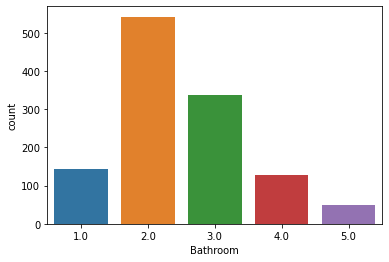

In [14]:
sns.countplot(df['Bathroom'])

In [15]:
df['Price'].sort_values(ascending=False).head(20)

473     240000000
472     240000000
513     220000000
1052    190000000
440     180000000
1036    170000000
418     135500000
1203    135000000
1206    135000000
1209    135000000
517     120000000
834     115000000
995     110000000
439     102500000
993     100000000
444     100000000
89      100000000
1204     93000000
1207     93000000
1210     93000000
Name: Price, dtype: int64

In [16]:
df.drop([473, 472, 513, 1052, 440, 1036],inplace=True)

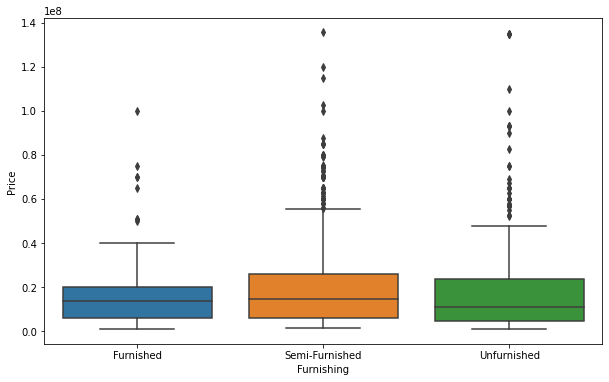

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot('Furnishing', 'Price', data=df)

In [18]:
df.drop(['Furnishing'], inplace=True, axis=1)

In [19]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Location         0
District         0
Locality         0
Parking         32
Status           0
Transaction      0
Type             5
Per_Sqft       240
Price            0
dtype: int64

In [20]:
df.Parking.fillna(0,inplace=True)

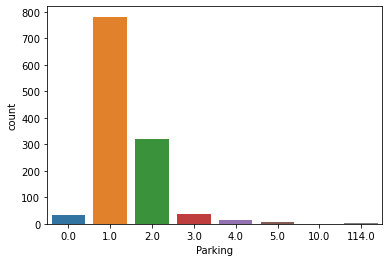

In [21]:
sns.countplot(df.Parking)

In [22]:
df[df.Parking>10]

,Area,BHK,Bathroom,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
252,1100.0,2,2.0,Vasundhara,East Delhi,Vasundhara Enclave,114.0,Ready_to_move,Resale,Apartment,NaN,10000000
902,900.0,2,2.0,Vasundhara,East Delhi,"Mangal Apartment, Vasundhara Enclave",114.0,Ready_to_move,Resale,Apartment,NaN,9000000
906,950.0,2,2.0,Vasundhara,East Delhi,Vasundhara Enclave,114.0,Ready_to_move,Resale,Apartment,NaN,8100000


In [23]:
df['Parking'].replace([114],1,inplace=True)
df['Parking'].replace([5,9,10],4,inplace=True)

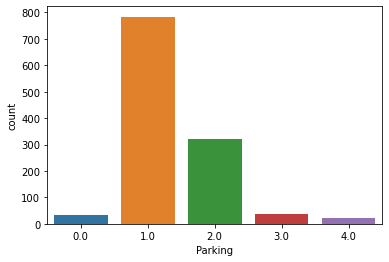

In [24]:
sns.countplot(df.Parking)

In [25]:
df.drop('Parking',axis=1,inplace=True)

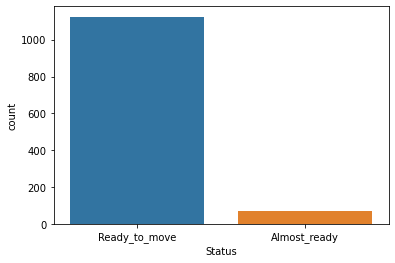

In [26]:
sns.countplot(df.Status)

In [27]:
df = df.drop('Status', axis=1)

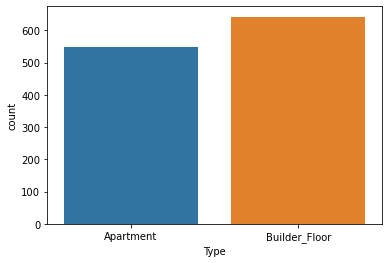

In [28]:
sns.countplot(df['Type'])

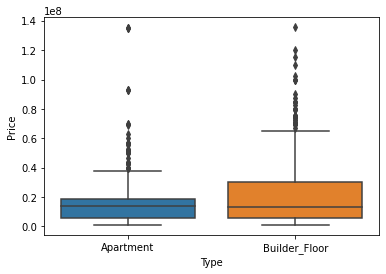

In [29]:
sns.boxplot('Type', 'Price', data=df)

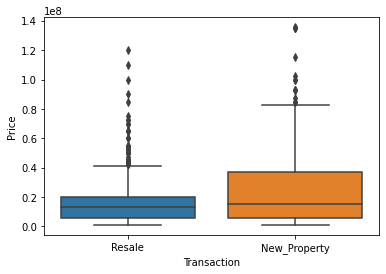

In [30]:
sns.boxplot('Transaction', 'Price', data=df)

In [31]:
df = df.drop('Transaction', axis=1)

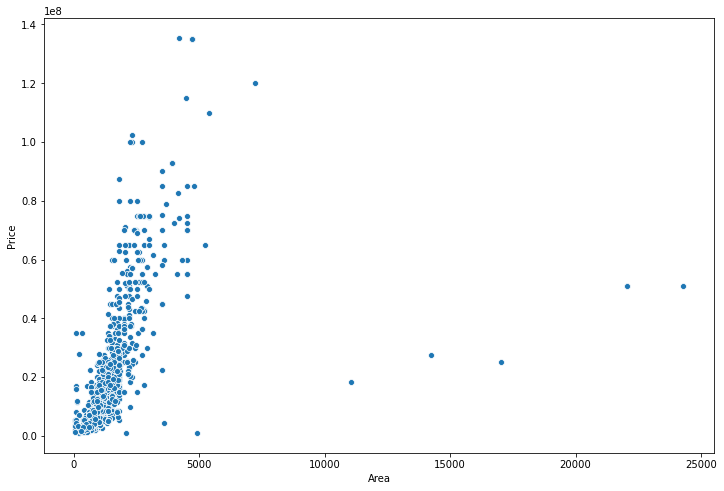

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot('Area', 'Price', data=df)

In [33]:
df[df['Area'] > 10000]

,Area,BHK,Bathroom,Location,District,Locality,Type,Per_Sqft,Price
429,22050.0,4,4.0,Greater Kailash,South Delhi,Greater Kailash 1,Builder_Floor,30556.0,51000000
431,22050.0,4,4.0,Greater Kailash,South Delhi,Greater Kailash 1,Builder_Floor,30556.0,51000000
603,24300.0,4,5.0,Saket,South Delhi,Saket,Builder_Floor,12500.0,51000000
806,14220.0,3,3.0,Paschim Vihar,West Delhi,Paschim Vihar Block B4,Builder_Floor,10943.0,27500000
835,17010.0,3,3.0,Punjabi Bagh,West Delhi,Punjabi Bagh West,Builder_Floor,15278.0,25000000
978,11050.0,3,3.0,Chittaranjan Park,South Delhi,Chittaranjan Park,Builder_Floor,12916.0,18500000


In [34]:
df.drop([429, 431, 603, 806, 835, 978],inplace=True)

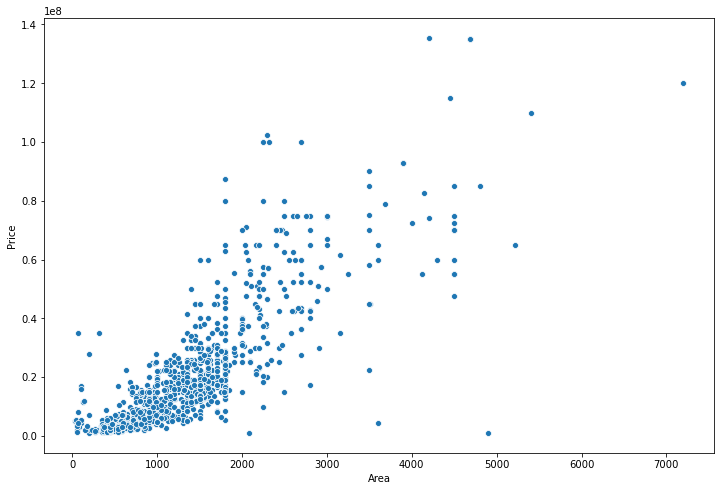

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot('Area', 'Price', data=df)

And there is a definitely a relation between 'Area','Price' and 'Per_Sqft', which is 'Per_Sqft' = 'Price'/'Area'.

Multicolinearity : if two or more features(except target variable) are highly correlated on each other,this phenomena is known as multicolinearity. we don't want that to happen as it just create redundancy in dataset.

so, we can eliminate one of the variable, as to make model less complex and that variable would be 'Per_Sqft' because it contains 240 NAN values.

In [36]:
df.drop('Per_Sqft',axis=1,inplace=True)

In [37]:
df.isnull().sum()

Area        0
BHK         0
Bathroom    2
Location    0
District    0
Locality    0
Type        5
Price       0
dtype: int64

In [38]:
df.Bathroom.fillna(df.Bathroom.median(),inplace=True)
df.Type.fillna('Apartment',inplace=True)

In [39]:
df.Locality.nunique()

347

In [40]:
df.drop('Locality',axis=1,inplace=True)

In [41]:
df.drop('District',axis=1,inplace=True)

In [42]:
df.head()

,Area,BHK,Bathroom,Location,Type,Price
0,950.0,2,2.0,Karol Bagh,Apartment,12500000
1,535.0,2,1.0,Karol Bagh,Apartment,3900000
2,1280.0,3,3.0,Karol Bagh,Builder_Floor,15000000
3,1135.0,3,3.0,Karol Bagh,Apartment,25000000
4,1135.0,3,3.0,Karol Bagh,Apartment,25000000


## Creating Dummy variables

In [43]:
df.groupby('Location').count()['Area'].sort_values().head()

Location
Janakpuri        2
Geeta Colony     4
Sultanpur       12
Budh Vihar      16
Manglapuri      18
Name: Area, dtype: int64

In [44]:
location_dum = pd.get_dummies(df['Location'])

In [45]:
location_dum.drop('Janakpuri', axis=1, inplace=True)

In [46]:
df = pd.concat([df, location_dum], axis=1)

In [47]:
df.drop('Location', axis=1, inplace=True)

In [48]:
type_dum = pd.get_dummies(df['Type'])

In [49]:
type_dum.drop('Builder_Floor', axis=1, inplace=True)

In [50]:
df = pd.concat([df, type_dum], axis=1)

In [51]:
df.drop('Type',axis=1,inplace=True)

In [52]:
df.head()

,Area,BHK,Bathroom,Price,Alaknanda,Budh Vihar,Chhattarpur,Chittaranjan Park,Dilshad Garden,Dwarka,...,Safdarjung Enclave,Saket,Sarita Vihar,Shahdara,Sheikh Sarai,Sultanpur,Uttam Nagar,Vasant Kunj,Vasundhara,Apartment
0,950.0,2,2.0,12500000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,535.0,2,1.0,3900000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1280.0,3,3.0,15000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1135.0,3,3.0,25000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1135.0,3,3.0,25000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Train Test Split

In [53]:
y = df.Price
X = df.drop('Price',axis=1)

In [54]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 101)

## Linear Model

In [55]:
lr = LinearRegression()

In [57]:
lr.fit(X,y)

LinearRegression()

In [58]:
pred = lr.predict(x_test)

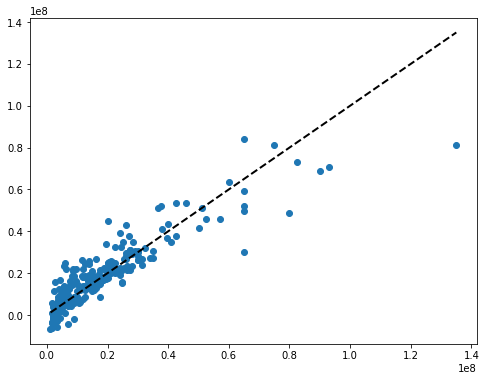

In [59]:
plt.figure(figsize=(8,6))
ax = plt.gca()

ax.scatter(y_test, pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)


#sns.scatterplot(y_test, pred)

In [60]:
print(sqrt(mse(y_test,pred)))

8150371.281281743


## Randomized Search CV

In [62]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [63]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [64]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

## Random Forest Model

In [61]:
model = RandomForestRegressor(n_estimators= 200,
                              min_samples_split = 2,
                              min_samples_leaf = 1,
                              max_features= 'sqrt',
                              max_depth = 60,
                              bootstrap= True)

In [62]:
model.fit(X,y)

RandomForestRegressor(max_depth=60, max_features='sqrt', n_estimators=200)

In [63]:
rf_pred =model.predict(x_test)

In [64]:
print(sqrt(mse(y_test,rf_pred)))

2883509.426850643


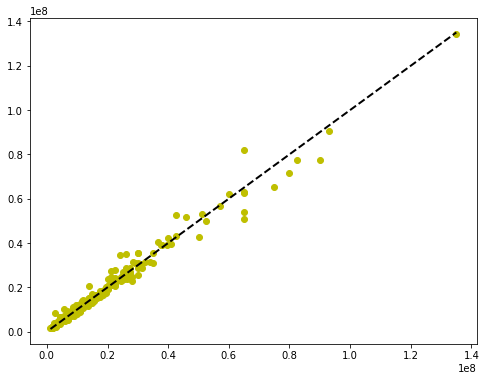

In [65]:
plt.figure(figsize=(8,6))
ax = plt.gca()
ax.scatter(y_test, rf_pred, c='y')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

In [87]:
def predict_price(location,area,bhk,bath,Type):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = bhk
    x[2] = bath
    if loc_index >= 0:
        x[loc_index] = 1
    if Type == 'Apartment':
        x[37] = 1
    return model.predict([x])[0]/100000

In [88]:
predict_price('Chhattarpur',1175,3,3,'Builder_Floor')

58.17666666666668

In [89]:
df.loc[ 997 , : ]['Price']/100000

50.0

In [90]:
predict_price('Sarita Vihar',1500,2,3,'Apartment')

159.71189484126984

In [91]:
df.loc[ 128 , : ]['Price']/100000

136.0

In [92]:
predict_price('Shahdara',850,3,2,'Builder_Floor')

53.10328571428571

In [93]:
df.loc[ 53 , : ]['Price']/100000

45.0

In [94]:
import pickle
with open('delhi_house_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

In [95]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))